In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.model_selection import KFold

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [11]:
flt_data = pd.read_csv("Flight_Booking.csv")

In [12]:
flt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [21]:
flt_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
flt_data = flt_data.drop(columns = ['Unnamed: 0', 'flight'])

In [11]:
flt_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [22]:
flt_data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
flt_data.duplicated().sum()

np.int64(0)

In [13]:
flt_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


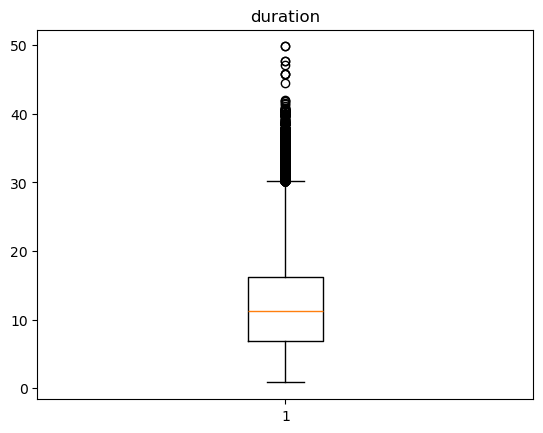

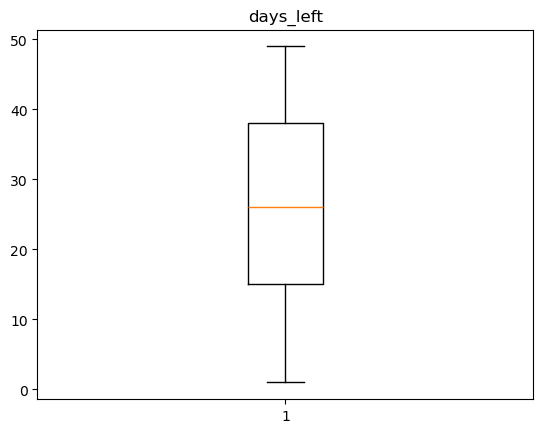

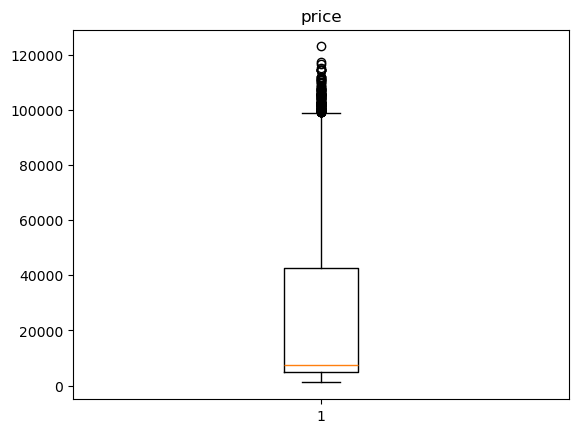

In [14]:
for columns in flt_data.columns:
    if flt_data[columns].dtype in ['int64','float64']:
        plt.boxplot(flt_data[columns])
        plt.title(columns)
        plt.show()

## Exploratory Data Analysis (EDA) on Flight Booking Data

Airline Vs Price

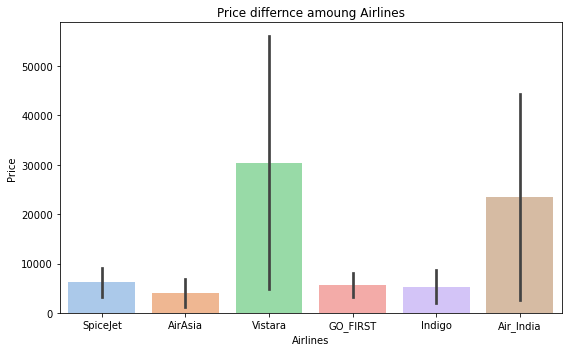

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data= flt_data, x = 'airline', y= 'price', estimator=np.mean, ci='sd', palette='pastel')
plt.title("Price differnce amoung Airlines")
plt.xlabel("Airlines")
plt.ylabel("Price")

# Show the plot
plt.tight_layout()
plt.show()
# plt.show()

This graph shows the average ticket price differences among airlines with standard deviation as error bars.

<AxesSubplot:xlabel='airline', ylabel='price'>

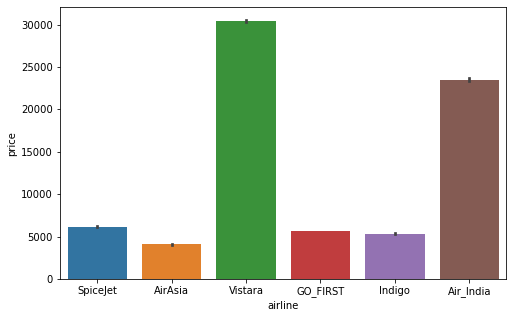

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(data= flt_data, x = 'airline', y= 'price')
plt.title("Price differnce amoung Airlines")
plt.xlabel("Airlines")
plt.ylabel("Price")

# Show the plot
plt.tight_layout()
plt.show()


This graph shows the average flight ticket prices for each airline.

In [41]:
airline = list(set(list(flt_data['airline'])))
airline

['SpiceJet', 'AirAsia', 'GO_FIRST', 'Indigo', 'Vistara', 'Air_India']

In [47]:
for name in airline:
    price = flt_data[(flt_data['airline'] == name)]
#     print("prince list ",price[10:])
#     print(name)
    price_mean = np.mean(list(price['price']))
    print("Mean --- %.2f airline -- %s"%(price_mean, name))


Mean --- 6179.28 airline -- SpiceJet
Mean --- 4091.07 airline -- AirAsia
Mean --- 5652.01 airline -- GO_FIRST
Mean --- 5324.22 airline -- Indigo
Mean --- 30396.54 airline -- Vistara
Mean --- 23507.02 airline -- Air_India


In [50]:
# Assuming your DataFrame is called df
mean_ratings = flt_data.groupby("airline")["price"].mean().reset_index()
# mean_ratings.columns = ["airline", "price"]

In [51]:
mean_ratings

,airline,price
0,AirAsia,4091.072742
1,Air_India,23507.019112
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
4,SpiceJet,6179.278881
5,Vistara,30396.536302


In [9]:
flt_data.groupby("airline").describe()

duration                                                         \
              count       mean       std   min    25%    50%    75%    max   
airline                                                                      
AirAsia     16098.0   8.941714  4.173152  0.92   5.92   9.33  11.83  19.58   
Air_India   80892.0  15.504235  7.613365  1.00  10.08  15.00  21.67  49.83   
GO_FIRST    23173.0   8.755380  4.015146  1.00   6.00   8.83  11.75  22.50   
Indigo      43120.0   5.795197  2.769322  0.83   2.92   6.00   7.75  15.42   
SpiceJet     9011.0  12.579767  8.927157  1.00   2.83  12.00  21.08  27.92   
Vistara    127859.0  13.326634  6.777230  1.00   8.50  12.50  17.00  47.08   

          days_left             ...                 price                \
              count       mean  ...   75%   max     count          mean   
airline                         ...                                       
AirAsia     16098.0  27.735184  ...  39.0  49.0   16098.0   4091.072742   
Air_India   80892.0  25.497466  ...  37.0  49.0   80892.0  23507.019112   
GO_FIRST    23173.0  27.430415  ...  38.0  49.0   23173.0   5652.007595   
Indigo      43120.0  26.264309  ...  38.0  49.0   43120.0   5324.216303   
SpiceJet     9011.0  24.122850  ...  36.0  49.0    9011.0   6179.278881   
Vistara    127859.0  25.894532  ...  38.0  49.0  127859.0  30396.536302   

                                                                     
                    std     min     25%      50%      75%       max  
airline                                                              
AirAsia     2824.055172  1105.0  2361.0   3276.0   4589.0   31917.0  
Air_India  20905.116909  1526.0  5623.0  11520.0  45693.0   90970.0  
GO_FIRST    2513.865560  1105.0  4205.0   5336.0   6324.0   32803.0  
Indigo      3268.894831  1105.0  3219.0   4453.0   6489.0   31952.0  
SpiceJet    2999.630406  1106.0  4197.0   5654.0   7412.0   34158.0  
Vistara    25637.159445  1714.0  6412.0  15543.0  55377.0  123071.0  

[6 rows x 24 columns]

In [17]:
flt_data.groupby('airline').size()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
dtype: int64

In [22]:
flt_data['airline'].value_counts().sort_values(ascending=False)  #sort_values to sort by value count sort_index to sort in alphabetical order

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [25]:
flt_data['source_city'].value_counts().sort_index()

Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
Name: source_city, dtype: int64

In [13]:
count_flight.shape

(16098, 11)

Days left Vs Price

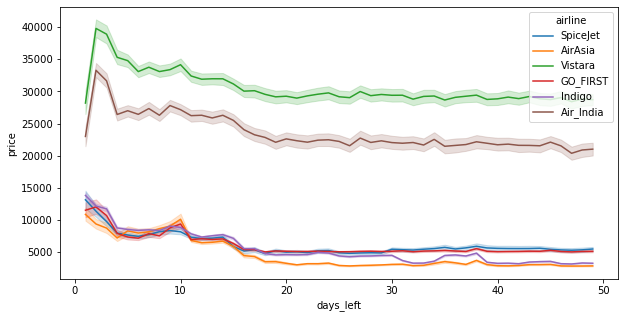

In [60]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=flt_data, x='days_left', y='price', hue='airline')

# plt.show()

This graph shows how flight ticket prices vary with the number of days left before departure across different airlines.

<AxesSubplot:xlabel='class', ylabel='price'>

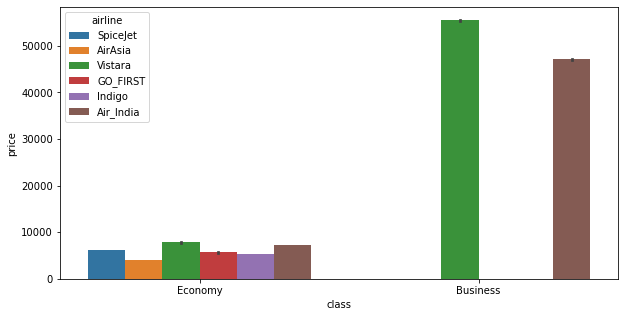

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(data=flt_data, x='class', y ='price', hue='airline')

Shows the average ticket prices across travel classes for different airlines.


Duration Vs Price

<Axes: xlabel='duration', ylabel='price'>

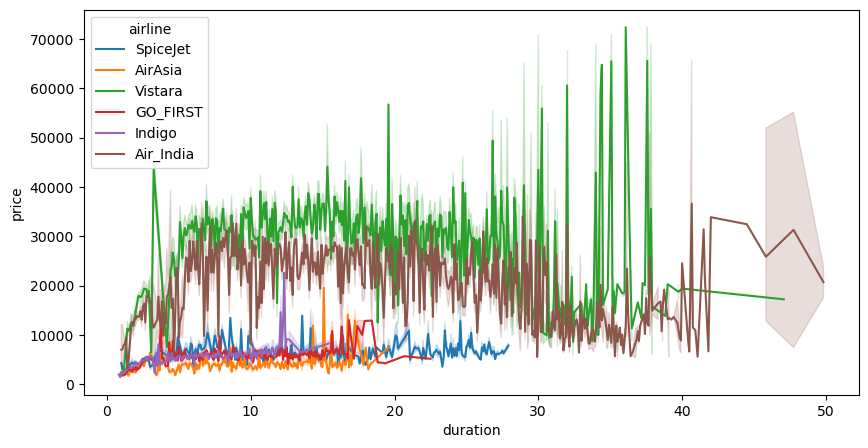

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=flt_data, x='duration', y='price', hue='airline')

Displays how ticket prices change with flight duration across airlines.

Flight Frequency by Airline

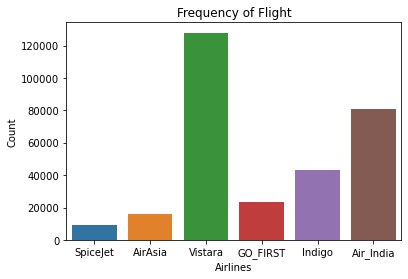

In [5]:
sns.countplot(data=flt_data,x='airline')
plt.title("Frequency of Flight")
plt.xlabel("Airlines")
plt.ylabel('Count')
plt.show()

This graph shows the frequency of flights operated by each airline.

Flight Count per Airline from Each Source City

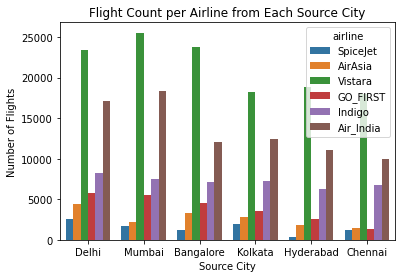

In [27]:
sns.countplot(x='source_city', hue='airline', data=flt_data)

plt.title("Flight Count per Airline from Each Source City")
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.show()

This graph shows the number of flights each airline operates from different source cities.

## 🤖 Machine Learning Model Implementation

In this section, different regression models are implemented to predict flight ticket prices. The models are trained, tested, and compared based on their performance metrics.


In [12]:
le = LabelEncoder()
flt_data['airline'] = le.fit_transform(flt_data['airline'])
#flt_data['flight'] = le.fit_transform(flt_data['flight'])
flt_data['source_city'] = le.fit_transform(flt_data['source_city'])
flt_data['departure_time'] = le.fit_transform(flt_data['departure_time'])
flt_data['stops'] = le.fit_transform(flt_data['stops'])
flt_data['arrival_time'] = le.fit_transform(flt_data['arrival_time'])
flt_data['destination_city'] = le.fit_transform(flt_data['destination_city'])
flt_data['class'] = le.fit_transform(flt_data['class'])

In [13]:
flt_data['stops'] = le.fit_transform(flt_data['stops'])
flt_data['arrival_time'] = le.fit_transform(flt_data['arrival_time'])
flt_data['destination_city'] = le.fit_transform(flt_data['destination_city'])
flt_data['class'] = le.fit_transform(flt_data['class'])

<Axes: >

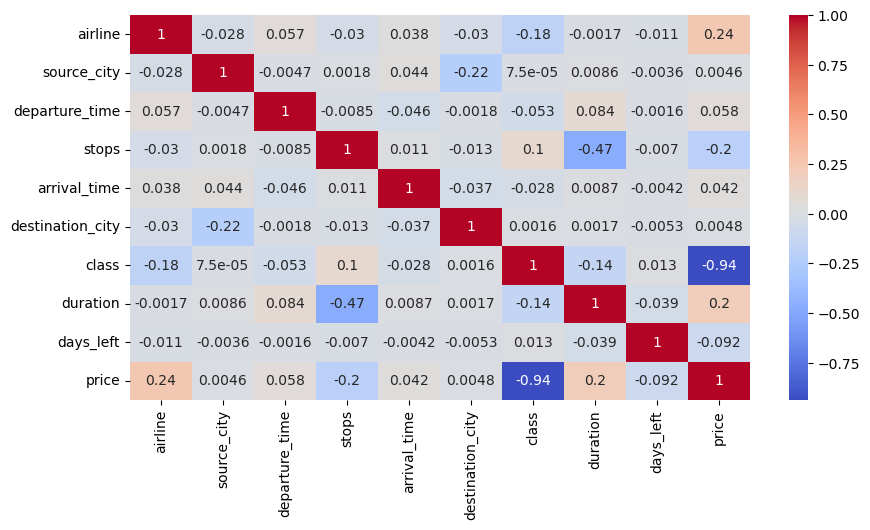

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(flt_data.corr(),annot=True, cmap='coolwarm')

In [15]:
#VIF
column_list = []
vif_data = pd.DataFrame()
for col in flt_data.columns:
    if flt_data[col].dtype != 'object' and col != 'price':
        column_list.append(col)
        
X = flt_data[column_list]
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

            Feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [16]:
y = flt_data['price']
X = flt_data.drop(columns = ['price', 'duration'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1️⃣ Linear Regression

A simple baseline model that assumes a linear relationship between the features and the target variable (price).  
- Useful for interpretability  
- May not capture complex non-linear relationships  

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
error = r2_score(y_test, y_pred)
print("Error -- ",error)

Error --  0.9039113488350009


In [48]:
y_pred

array([ 4585.88050973, 52842.07707274,  7877.98018389, ...,
        5848.96550018, -1498.06191817, 58762.40634474])

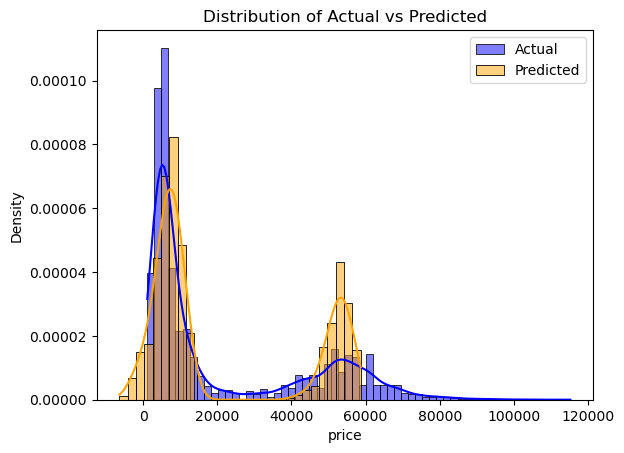

In [20]:
sns.histplot(y_test, label='Actual', color='blue', kde=True, stat="density")
sns.histplot(y_pred, label='Predicted', color='orange', kde=True, stat="density")
plt.title("Distribution of Actual vs Predicted")
plt.legend()
plt.show()

This graph compares the distribution of actual flight prices versus predicted prices, showing how closely the model’s predictions align with real values.

### 2️⃣ Decision Tree Regressor

A tree-based model that splits data into subsets based on feature values.  
- Handles non-linearity well  
- Can overfit without pruning or depth control 

In [21]:
# Define model and hyperparameter grid
dt_model = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch with 5-fold CV
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Best results
print("🔹 Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best R² Score on Training Set:", dt_grid.best_score_)

# Evaluate on test set
dt_best_model = dt_grid.best_estimator_
y_pred_dt = dt_best_model.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MSE:", mean_squared_error(y_test, y_pred_dt))


🔹 Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² Score on Training Set: 0.9649101431009642
Test R²: 0.964501703346196
Test MSE: 18298742.666925214


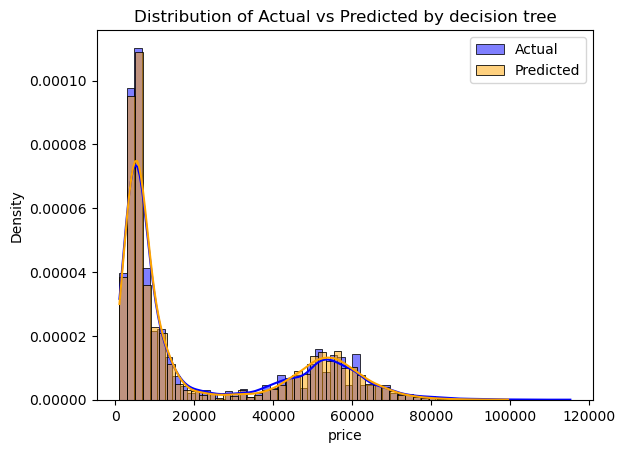

In [24]:
sns.histplot(y_test, label='Actual', color='blue', kde=True, stat="density")
sns.histplot(y_pred_dt, label='Predicted', color='orange', kde=True, stat="density")
plt.title("Distribution of Actual vs Predicted by decision tree")
plt.legend()
plt.show()

This graph shows the distribution of actual vs. predicted flight prices using the Decision Tree Regressor. The model achieved an excellent R² score of 0.96, which is significantly better than Linear Regression, and the prediction curve aligns closely with the actual distribution.

### 3️⃣ Random Forest Regressor

An ensemble of multiple decision trees where predictions are averaged.  
- Reduces overfitting compared to a single decision tree  
- Provides higher accuracy and robustness 

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 19789438.10
R² Score: 0.96


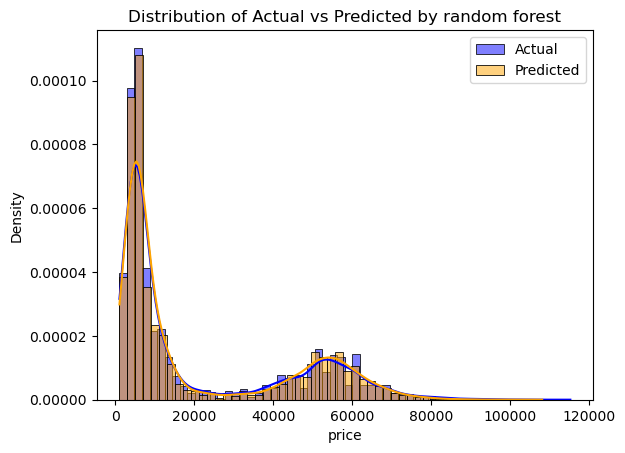

In [26]:
sns.histplot(y_test, label='Actual', color='blue', kde=True, stat="density")
sns.histplot(y_pred, label='Predicted', color='orange', kde=True, stat="density")
plt.title("Distribution of Actual vs Predicted by random forest")
plt.legend()
plt.show()

This graph compares actual vs. predicted price distributions for the Random Forest Regressor. With an R² score of 0.96, the model delivers highly accurate predictions, and the overlap between actual and predicted values is strong, reducing variance compared to a single decision tree.

### 4️⃣ XGBoost Regressor

An advanced gradient boosting algorithm that builds trees sequentially to minimize error.  
- Efficient and scalable  
- Often outperforms other models on structured/tabular data  

In [30]:
xgb_model = XGBRegressor(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=5,           # tree depth
    random_state=42,
    n_jobs=-1
)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [33]:
y_pred = xgb_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 19484536.00
R² Score: 0.96


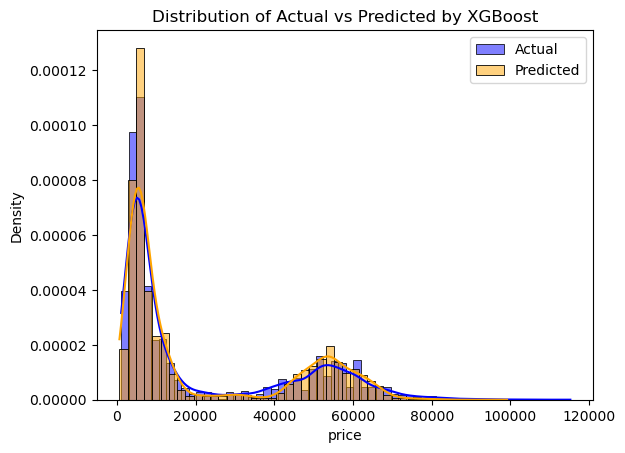

In [34]:
sns.histplot(y_test, label='Actual', color='blue', kde=True, stat="density")
sns.histplot(y_pred, label='Predicted', color='orange', kde=True, stat="density")
plt.title("Distribution of Actual vs Predicted by XGBoost")
plt.legend()
plt.show()

This graph illustrates the actual vs. predicted distributions using the XGBoost Regressor. The model also achieved an R² score of 0.96, showing excellent performance with smooth prediction alignment, leveraging gradient boosting to enhance accuracy.

## 📊 Final Summary

Among all models tested, Decision Tree, Random Forest, and XGBoost performed exceptionally well with an R² score of 0.96, significantly outperforming Linear Regression. Their prediction distributions closely matched the actual flight prices, confirming that tree-based ensemble methods are more effective for this dataset.